In [1]:
!pip install numpy tensorflow matplotlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/375.9 MB 7.2 MB/s eta 0:00:52
    --------------------------------------- 5.0/375.9 MB 14.4 MB/s eta 0:00:26
   - -------------------------------------- 9.4/375.9 MB 16.8 MB/s eta 0:00:22
   - -------------------------------------- 13.4/375.9 MB 17.9 MB/s eta 0:00:21
   - -------------------------------------- 18.4/375.9 MB 19.0 MB/s eta 0:00:19
   -- ------------------------------------- 23.3/375.9 MB 20.0 MB/s eta 0:00:18
   -- ------------------------------------- 27.5/375.9 MB 20.1 MB/s eta 0:00:18
   --- ------------------------------------ 32.2/375.9 MB 20.5 MB/s eta 0:00:17
   --- ------------------------------------ 36.4/375.9 MB 20.5 MB/s eta 0:00:17
   ---- ----------------------------------- 40.4/375.9 MB 20.4 MB/s eta 

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


In [3]:
# Загружаем набор данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Нормализуем данные (приведём к диапазону [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Добавим четвёртое измерение (канал изображения)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Преобразуем метки в one-hot формат
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9029 - loss: 0.3219 - val_accuracy: 0.9799 - val_loss: 0.0626
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9840 - loss: 0.0505 - val_accuracy: 0.9862 - val_loss: 0.0452
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9861 - val_loss: 0.0406
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9913 - loss: 0.0275 - val_accuracy: 0.9904 - val_loss: 0.0301
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9909 - val_loss: 0.0296


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точность на тестовых данных: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0407
Точность на тестовых данных: 0.9909


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


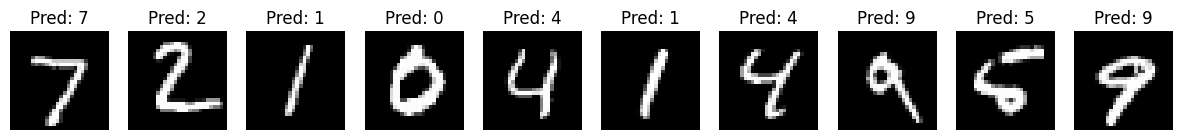

In [7]:
# Предсказание на нескольких изображениях
predictions = model.predict(x_test[:10])

# Визуализация
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()
